In [8]:
import pickle
data = pickle.load(open('pax_data.pkl', 'rb'))

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import pandas as pd

<AxesSubplot: >

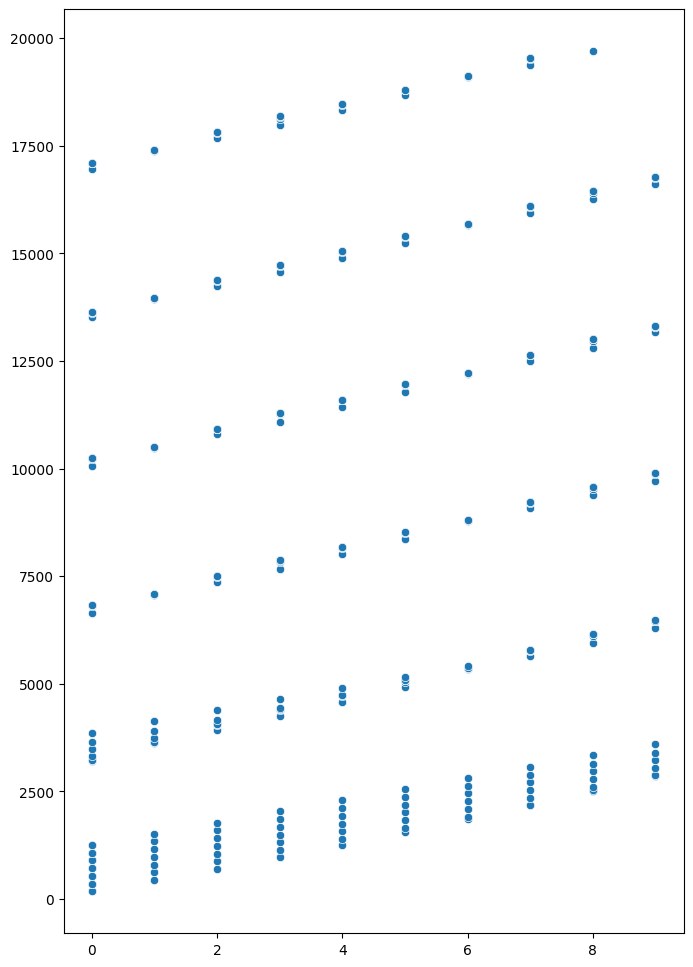

In [2]:


plt.figure(figsize=(8, 12))
data = pickle.load(open('data.pkl', 'rb'))
data_plot = np.array([[k, i] for k, v in data.items() for i in v])
sns.scatterplot(x=data_plot[:, 0], y=data_plot[:, 1])

<AxesSubplot: >

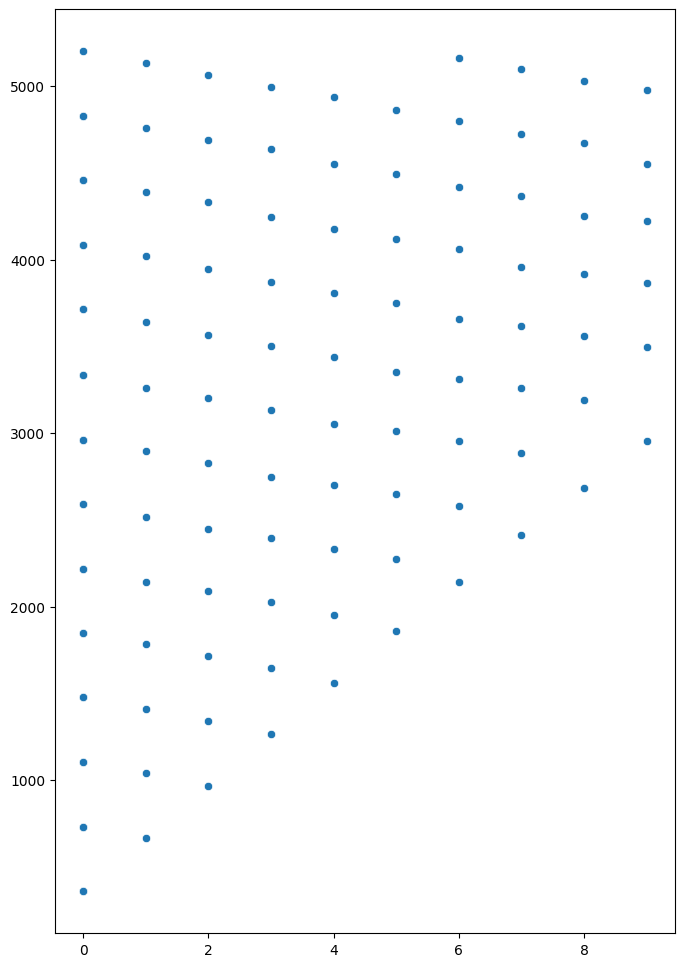

In [3]:
plt.figure(figsize=(8, 12))
data = pickle.load(open('env_data4.pkl', 'rb'))
data_plot = np.array([[k, i] for k, v in data.items() for i in v])
sns.scatterplot(x=data_plot[:, 0], y=data_plot[:, 1])

In [4]:
data_action = pickle.load(open('action_list4.pkl', 'rb'))
print(data_action)

EOFError: Ran out of input

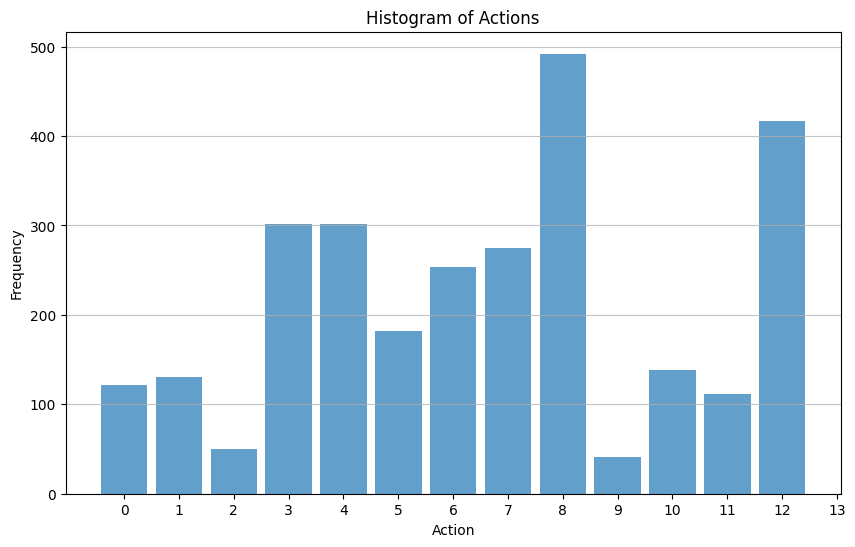

In [11]:
df = pd.DataFrame(data_action, columns=['Action'])

# Plot a histogram
plt.figure(figsize=(10,6))
plt.hist(df['Action'], bins=range(min(data_action), max(data_action) + 1, 1), alpha=0.7, rwidth=0.85, align='left')
plt.title('Histogram of Actions')
plt.xlabel('Action')
plt.ylabel('Frequency')
plt.xticks(range(min(data_action), max(data_action) + 1, 1))
plt.grid(axis='y', alpha=0.75)
plt.show()

In [54]:
from stable_baselines3 import PPO
model = PPO.load("./results/bus_env")

In [60]:
model.policy.action_net.weight

Parameter containing:
tensor([[ 0.0018,  0.0023,  0.0005,  0.0039,  0.0063],
        [-0.0069, -0.0046,  0.0005,  0.0038,  0.0073],
        [ 0.0044, -0.0037, -0.0052, -0.0005,  0.0005],
        [-0.0014,  0.0033, -0.0005, -0.0017,  0.0082],
        [-0.0018,  0.0052, -0.0020, -0.0007,  0.0011],
        [ 0.0019, -0.0026, -0.0003,  0.0020, -0.0003],
        [ 0.0035, -0.0007,  0.0031, -0.0044,  0.0031],
        [-0.0013,  0.0014, -0.0035,  0.0185, -0.0082],
        [ 0.0005,  0.0010, -0.0051, -0.0016,  0.0020],
        [ 0.0005,  0.0030,  0.0005, -0.0015, -0.0030],
        [-0.0013,  0.0004, -0.0009, -0.0015, -0.0016],
        [-0.0012, -0.0008, -0.0041, -0.0029, -0.0001]], requires_grad=True)

In [65]:
import torch
import torch.nn as nn

encoder_layer = nn.TransformerEncoderLayer(d_model=512, nhead=8)
transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=6)
src = torch.rand(12, 1, 512)
out = transformer_encoder(src)

In [6]:
import torch.nn as nn
import torch
nn.Linear(8, 32)(torch.zeros(12, 8)).size()

torch.Size([12, 32])

In [3]:
env = Env()
obs = env.reset()
model.predict(obs)

[(9, {'location': 0, 'pax': 0, 'h_action': None, 'l_action': None, 'action_duration': 0, 'ego': 0, 'headway': 0.0}), (8, {'location': 0, 'pax': 0, 'h_action': None, 'l_action': None, 'action_duration': 0, 'ego': 0, 'headway': 0.0}), (7, {'location': 0, 'pax': 0, 'h_action': None, 'l_action': None, 'action_duration': 0, 'ego': 0, 'headway': 0.0}), (6, {'location': 0, 'pax': 0, 'h_action': None, 'l_action': None, 'action_duration': 0, 'ego': 0, 'headway': 0.0}), (5, {'location': 0, 'pax': 0, 'h_action': None, 'l_action': None, 'action_duration': 0, 'ego': 0, 'headway': 0.0}), (4, {'location': 0, 'pax': 0, 'h_action': None, 'l_action': None, 'action_duration': 0, 'ego': 0, 'headway': 0.0}), (3, {'location': 0, 'pax': 0, 'h_action': None, 'l_action': None, 'action_duration': 0, 'ego': 0, 'headway': 0.0}), (2, {'location': 0, 'pax': 0, 'h_action': None, 'l_action': None, 'action_duration': 0, 'ego': 0, 'headway': 0.0}), (1, {'location': 0, 'pax': 0, 'h_action': None, 'l_action': None, 'acti

(array([0.619878], dtype=float32), None)

In [4]:
from stable_baselines3 import PPO
from DiscreteEnv import Env
import pickle

model = PPO.load("./results/bus_env_ppo_cont")

env = Env()
obs = env.reset()
while True:
    action, _ = model.predict(obs)
    obs, rewards, dones, info = env.step(action[0])
    print(obs)
    print(action)
    # if rendering
    if dones:
        break
pickle.dump(env.data, open('data.pkl', 'wb'))


[0, 1, 0, 240.0, 2400.0]
[0.]
[0, 0, 1.175, 0.0, 261.0]
[1.]
[0.475, 2, 0, 303.0, 2289.1945037888117]
[0.]
[0, 1, 2, 240.0, 240.0]
[1.]
[0, 0, 1, 0.0, 240.0]
[1.]
[1.2299999999999993, 3, 0, 332.4000000000001, 2160.0]
[1.]
[0, 2, 3, 360.0, 240.0]
[1.]
[0, 1, 2, 240.0, 240.0]
[1.]
[2, 4, 0, 360.0, 2075.415772258346]
[0.71449363]
[0, 0, 1, 0.0, 240.0]
[1.]
[1, 3, 4, 360.0, 240.0]
[0.43265796]
[0, 1, 1.7243133569843507, 263.2960487624871, 86.9176028381221]
[1.]
[1, 2, 3, 240.0, 240.0]
[0.7881098]
[3, 5, 0, 360.0, 1920.0]
[1.]
[0, 0, 1, 0.0, 240.0]
[1.]
[2, 4, 5, 360.0, 240.0]
[0.6532061]
[0.09840930949518452, 2, 2.156478026021216, 348.19088286057786, 18.777363122545943]
[1.]
[4, 6, 0, 380.70207129839395, 1909.691137512463]
[1.]
[2, 3, 4, 240.0, 240.0]
[1.]
[0, 1, 2, 240.0, 240.0]
[1.]
[0, 0, 1, 0.0, 240.0]
[0.35797834]
[3, 5, 6.152482739180054, 360.0, 258.29792870160645]
[0.06235385]
[1.9114417935497499, 3, 3, 250.62698477403, 0.0]
[1.]
[0.698245906829834, 2, 3, 276.2104911804199, 240.0]
[

In [2]:
_

In [66]:
out.size()

torch.Size([12, 1, 512])

In [9]:
from gym.spaces import Box

In [14]:
obs_space = Box(low=-1e4, high=1e4, shape=(96,))

In [15]:
obs_space.sample().shape

(96,)

In [16]:
class Student:
    def __init__(self, name, age):
        self.name = name
        self.age = age
    def __repr__(self):
        return 'Student(%s, %s)' % (self.name, self.age)

In [18]:
kwards = {'name': 'John', 'age': 20, 'hi': 1}
student = Student('John', 'age', **kwards)

TypeError: Student.__init__() got multiple values for argument 'name'

In [1]:
int(5.8//2)

2

In [4]:
from itertools import chain
list(chain(range(5), range(5)))

[0, 1, 2, 3, 4, 0, 1, 2, 3, 4]